In [1]:

from src.returnAnalysis import *
from src.returnAnalysis import hyp_annual_return_is
from scipy.stats import gaussian_kde as gkde

from src.best_fit import *

path_csv      = "../ativos/"
arq_Ibov_csv  = "IBOV_InfoMoney.csv"
arq_Totus_csv = "TOTS3_InfoMoney.csv"
arq_Totus_pkl = "ibov_tots3.pkl"

<img align="left" width="100" height="100" src="LogoUNB.jpg">

<h3><div style="text-align:center">UNB - Universidade de Brasília <br>
Programa  de Pós-Graduação em Computação Aplicada <br>
Análise Estatística de Dados e Informações - AEID
</h3> 

<h3><div style="text-align:center">
Lista de exercícios 01 </h3> 

<h5><div style="text-align:left">
Alunos: <br>
    Amilton Lobo - 20/0094921<br>
    Tiago Pereira Vidigal - 20/0095773<br>
    Weisner Calafiori Resende - 20/0095781<br>
    </h5> 
<br>
<div style="text-align:right"> 
Brasília, 29 de março de 2021

<div style="text-align:left"> 
<b>1ª Avaliação (valor 4 pontos): </b><br> <br> 
    Neste exercício o Grupo deve selecionar o preço de um ativo de 
    qualquer setor, além do ativo IBOVESPA. O grupo deve escolher estes ativos na B3 (preço de fechamento diário) no período de tempo de, aproximadamente, 1 ano (iniciando na data de 16/março/2020 até o dia do levantamento dos dados do grupo) selecionando o ativo de um dos seguintes setores:<br>
1)	Bancário;<br> 
2)	Turismo;<br> 
3)	Alimentação;<br> 
4)	Mineração;<br>
5)	Petróleo e Petroquímica;<br>
6)	Agronegócio;<br>
7)	Logística;<br>
8)	Bebidas;<br>
9)	Farmacêutico;<br>
10)	Construção Civil ou<br>
11)	Outros setores específicos (apresentar sugestão ao Professor).<br>
<br>
O ativo selecionado foi o TOTS3, do setor de tecnologia.

<b>a)	Inicialmente achem o retorno do ativo e do IBOVESPA com a seguinte fórmula de retorno contínuo: Ln (Pt/Pt-1).</b>


In [2]:
# Preparing IBOV dataframe
ibov = pd.read_csv(path_csv + arq_Ibov_csv, usecols=["DATA", "FECHAMENTO"])
ibov.columns = ["date", "ibov"]

# Preparing TOTS3 dataframe
tots3 = pd.read_csv(path_csv + arq_Totus_csv, usecols=["DATA", "FECHAMENTO"], decimal=',')
tots3.columns = ["date", "tots3"]

# Merge and format correction
dfTotus = pd.merge(ibov, tots3, on="date")
dfTotus['date'] = pd.to_datetime(dfTotus['date'], format="%d/%m/%Y")
dfTotus.sort_values(by=['date'])

dfTotus.index.name = 'indice'  

# Salva df
dfTotus.to_pickle(path_csv + arq_Totus_pkl)

print( dfTotus.head(10) )
print()
print( dfTotus.tail(10) )

             date     ibov  tots3
indice                           
0      2021-03-05  115.202  30.12
1      2021-03-04  112.690  30.61
2      2021-03-03  111.184  30.93
3      2021-03-02  111.540  31.02
4      2021-03-01  110.335  31.48
5      2021-02-26  110.035  31.38
6      2021-02-25  112.358  31.85
7      2021-02-24  115.668  33.13
8      2021-02-23  115.227  33.52
9      2021-02-22  112.668  33.49

             date    ibov  tots3
indice                          
231    2020-03-27  73.429  15.00
232    2020-03-26  77.710  17.53
233    2020-03-25  74.956  18.13
234    2020-03-24  69.729  15.13
235    2020-03-23  63.570  14.41
236    2020-03-20  67.069  14.41
237    2020-03-19  68.332  13.88
238    2020-03-18  66.895  14.13
239    2020-03-17  74.617  16.69
240    2020-03-16  71.168  16.32


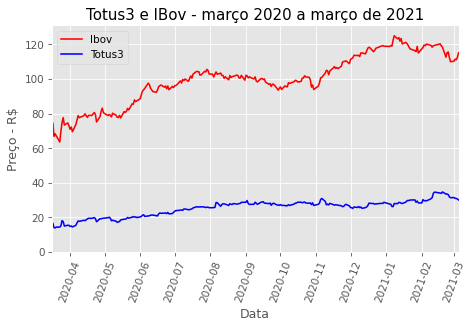

In [3]:
%matplotlib inline 
#esta linha dispensa que se insira plt.show. Basta plt.plot() para traçar o gráfico.

plt.rcParams['figure.figsize'] = (7,4)  #Figsize define o tamanho da figura no qual o eixo será inserido
plt.rcParams['figure.dpi']     = (75)   # dpi é o ponto por polegada (pixel por polegada).

plt.xticks(rotation=70)

# Definição da linha verde
x = dfTotus['date']
y = dfTotus['ibov']
plt.plot(x, y, color='red', label='Ibov')

# Definição da linha cyan 
y = dfTotus['tots3']
plt.plot(x, y, color='blue', label='Totus3')


# definição de parâmetros do eixo cartesiano
y_max = int( max(dfTotus['ibov'].max(),dfTotus['tots3'].max()) * 1.05 )
plt.axis([dfTotus['date'].min(), dfTotus['date'].max(), # valores mínimos e máximos do eixos X
         0, y_max ])                                    # valores mínimos e máximos do eixos Y   
plt.title('Totus3 e IBov - março 2020 a março de 2021')  # texto a ser exibido como título do gráfico
plt.xlabel('Data') # texto a ser exibido no eixo X
plt.ylabel('Preço - R$') # texto a ser exibido no eixo Y
plt.grid(True)       # desenha um grid 
plt.legend()         # insere as legendas definidas anteriormente no comando plot

plt.show() 
# salva a figura do gráfico. A extensão do arquivo pode ser alterada: jpg, gif, png...
#plt.savefig("Grafico.png", dpi=100)  não funcionou



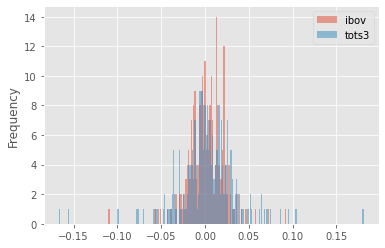

In [4]:
%matplotlib inline 
log_ret = generate_log_return(dfTotus)
log_ret.plot.hist(alpha=0.5, bins=len(log_ret))
log_ret.plot

<div style="text-align:left">
A trasformação do preço de fechamento em retorno contínuo realiza uma
normalização dos dados, permitindo a comparação entre eles.<br>

<b>b)	Faça a Estatística Descritiva dos Dados de retorno (medidas: média, mediana, moda, quartis, assimetria, curtose, variância, desvio padrão e gráfico de linha - temporal e da distribuição de probabilidade).</b>

In [5]:
indice  = ['media','mediana','moda','quartil_25','quartil_50','quartil_75','assimetria',
           'curtose','variância','desv_padrao']
colunas = ['ibov','tots3']
dfEstDesc = pd.DataFrame(index = indice, columns = colunas)

dfEstDesc.loc[ "media"      ]['ibov' ] = log_ret['ibov' ].mean()
dfEstDesc.loc[ "media"      ]['tots3'] = log_ret['tots3'].mean()
dfEstDesc.loc[ "mediana"    ]['ibov' ] = log_ret['ibov' ].median()
dfEstDesc.loc[ "mediana"    ]['tots3'] = log_ret['tots3'].median()
dfEstDesc.loc[ "moda"       ]['ibov' ] = log_ret['ibov' ].mode()[0]
dfEstDesc.loc[ "moda"       ]['tots3'] = log_ret['tots3'].mode()[0]
dfEstDesc.loc[ "quartil_25" ]['ibov' ] = log_ret['ibov' ].quantile(0.25)
dfEstDesc.loc[ "quartil_25" ]['tots3'] = log_ret['tots3'].quantile(0.25)
dfEstDesc.loc[ "quartil_50" ]['ibov' ] = log_ret['ibov' ].quantile(0.50)
dfEstDesc.loc[ "quartil_50" ]['tots3'] = log_ret['tots3'].quantile(0.50)
dfEstDesc.loc[ "quartil_75" ]['ibov' ] = log_ret['ibov' ].quantile(0.75)
dfEstDesc.loc[ "quartil_75" ]['tots3'] = log_ret['tots3'].quantile(0.75)
dfEstDesc.loc[ "assimetria" ]['ibov' ] = log_ret['ibov' ].skew()
dfEstDesc.loc[ "assimetria" ]['tots3'] = log_ret['tots3'].skew()
dfEstDesc.loc[ "curtose"    ]['ibov' ] = log_ret['ibov' ].kurtosis()
dfEstDesc.loc[ "curtose"    ]['tots3'] = log_ret['tots3'].kurtosis()
dfEstDesc.loc[ "variância"  ]['ibov' ] = log_ret['ibov' ].var()
dfEstDesc.loc[ "variância"  ]['tots3'] = log_ret['tots3'].var()
dfEstDesc.loc[ "desv_padrao"]['ibov' ] = log_ret['ibov' ].std()
dfEstDesc.loc[ "desv_padrao"]['tots3'] = log_ret['tots3'].std()

dfEstDesc

,ibov,tots3
media,0.001999,0.002543
mediana,0.001726,0.002331
moda,-0.109244,0.0
quartil_25,-0.010592,-0.011703
quartil_50,0.001726,0.002331
quartil_75,0.013748,0.018223
assimetria,-0.324037,-0.26778
curtose,4.864792,7.403071
variância,0.00043,0.001138
desv_padrao,0.020736,0.033735


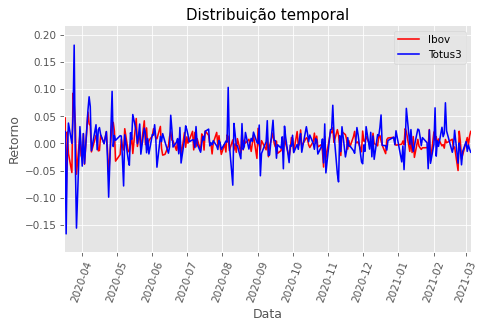

In [6]:
%matplotlib inline 
#esta linha dispensa que se insira plt.show. Basta plt.plot() para traçar o gráfico.

plt.rcParams['figure.figsize'] = (7,4)  #Figsize define o tamanho da figura no qual o eixo será inserido
plt.rcParams['figure.dpi']     = (75)   # dpi é o ponto por polegada (pixel por polegada).

plt.xticks(rotation=70)

# Definição da linha vermelha 
x = dfTotus['date']
y = log_ret['ibov']
plt.plot(x, y, color='red', label='Ibov')

# Definição da linha azul 
y = log_ret['tots3']
plt.plot(x, y, color='blue', label='Totus3')  

# definição de parâmetros do eixo cartesiano
y_max = max(log_ret['ibov'].max(),log_ret['tots3'].max()) * 1.2
y_min = min(log_ret['ibov'].min(),log_ret['tots3'].min()) * 1.2
plt.axis([dfTotus['date'].min(), dfTotus['date'].max(), # valores mínimos e máximos do eixos X
          y_min, y_max ])                               # valores mínimos e máximos do eixos Y

plt.title("Distribuição temporal")
plt.xlabel('Data')    # texto a ser exibido no eixo X
plt.ylabel('Retorno') # texto a ser exibido no eixo Y
plt.grid(True)        # desenha um grid 
plt.legend()          # insere as legendas definidas anteriormente no comando plot

plt.show()

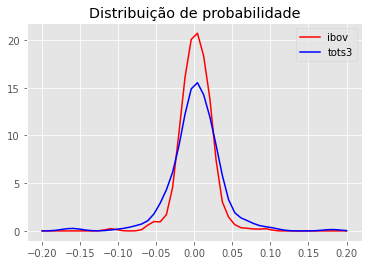

In [7]:
%matplotlib inline
plt.figure( figsize=(7, 4), dpi=75 )  # w=7 h=4 dpi=75
plt.title('Função distribuição de probabilidade')
plt.xlabel('Retorno')
plt.ylabel('Probabilidade')

density_ibov = gkde(log_ret['ibov'].sort_values())
density_tots3 = gkde(log_ret['tots3'].sort_values())
_, x_ibov, _ = plt.hist(log_ret['ibov'].sort_values(), bins=np.linspace(-0.2, 0.2, 50),
                   histtype=u'step', density=True)
_, x_tots3, _ = plt.hist(log_ret['tots3'].sort_values(), bins=np.linspace(-0.2, 0.2, 50),
                   histtype=u'step', density=True)
plt.close()
plt.plot(x_ibov, density_ibov(x_ibov), 'r', label='ibov')
plt.plot(x_tots3, density_tots3(x_tots3), 'b', label='tots3')
plt.title("Distribuição de probabilidade")
plt.legend()

<div style="text-align:left">
Os retornos do IBOV e TOTS3 possuem média e mediana muito próximos a zero, além de
um excesso de curtose positiva (leptocúrticas). Eles também possuem assimetria negativa,
indicando uma tendencia de termos um retorno acumulado positivo no longo prazo, como
pode ser visto pelo crescimento no gráfico de preços de fechamento.
No entanto, o ativo TOTS3 apresenta um desvio padrão maior, indicando uma chance maior de
ganhos acima ou abaixo do IBOV. Nenhum dos ativos, no entato, se mostrar efetivamente
melhor que o outro, devendo ser escolhido de acordo com o perfil do investidor.


<b>c)	O objetivo é encontrar, pelo Risk Simulator ou Excel, a distribuição de melhor ajuste para a base de Dados do retorno do ativo. </b>


Text(0, 0.5, 'Frequency')

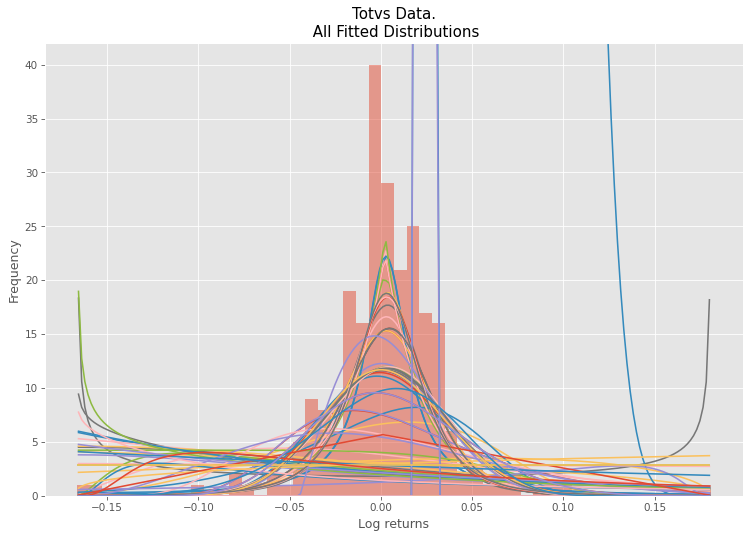

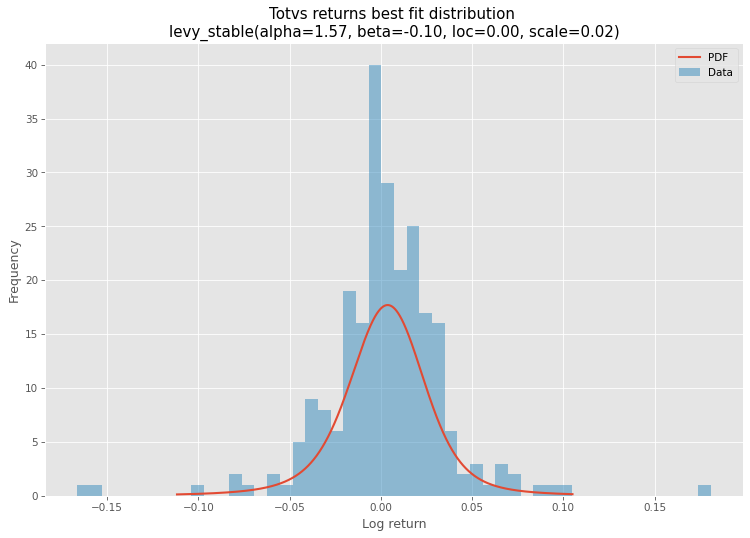

In [7]:
from src.best_fit import best_fit_distribution

# Load data from statsmodels datasets
data = log_ret['tots3'] #pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, alpha=0.5)#, normed=True, alpha=0.5)#, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Totvs Data.\n All Fitted Distributions')
ax.set_xlabel(u'Log returns')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)

#data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)
data.plot(kind='hist', bins=50, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Totvs returns best fit distribution \n' + dist_str)
ax.set_xlabel(u'Log return')
ax.set_ylabel('Frequency')

<div style="text-align:left">
A distribuição que mais se aproximou do retorno do ativo TOTS3 foi a Levy estável, com
alpha 1.57, beta -0.1, média 0 e desvio padrão 0.02.


<b>d)	Independentemente deste resultado o grupo fará uma Simulação pela Distribuição Normal do retorno do ativo, </b>


<AxesSubplot:>

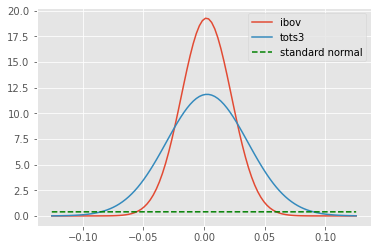

In [9]:
# ptrim = 0.01: Shows the "entire" normal distribution
# ptrim = 0.45: Shows the assets distribution much better
ptrim = 0.45
x_axis = np.linspace(st.norm.ppf(ptrim), st.norm.ppf(1-ptrim), 100)
dist = normal_simulation(log_ret, ptrim)
fig_dist, ax_dist = plt.subplots()
ax_dist.plot(x_axis, dist)
ax_dist.plot(x_axis, st.norm.pdf(x_axis), 'g--')
ax_dist.legend(["ibov", "tots3", "standard normal"])
ax_dist

<div style="text-align:left">
O retorno dos investimentos, por serem leptocurticos, apresentam um desvio padrão muito
menor comparado a normal padrão. Isso causa o aparente "achatamento" da normal quando
comparada à distribuição dos ativos. Nesta imagem, fica mais aparente o menor risco
apresentado pelo IBOV comparado ao TOTS3, onde a chance deste obter retornos maiores
(ou menores) é superior a aquele.


<b>e)	Posteriormente o grupo fará o IC (95%) para a distribuição dos retornos. </b>


IC 95%:
 - IBOV:  (-0.03855900956676231, 0.04255605379941074)
 - TOTS3: (-0.0634384089052269, 0.06852386992925785)


<AxesSubplot:>

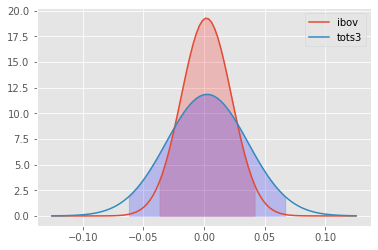

In [10]:
ibov_ci = confidence_interval(log_ret["ibov"], 0.95)
tots3_ci = confidence_interval(log_ret["tots3"], 0.95)
print("IC 95%:")
print(" - IBOV: ", ibov_ci)
print(" - TOTS3:", tots3_ci)
fig_ci, ax_ci = plt.subplots()
ax_ci.plot(x_axis, dist)
ax_ci.legend(["ibov", "tots3"])
ax_ci.fill_between(x_axis, dist['ibov'], 0, where=(x_axis>ibov_ci[0]) & (x_axis<ibov_ci[1]), color='r', alpha=0.2)
ax_ci.fill_between(x_axis, dist['tots3'], 0, where=(x_axis>tots3_ci[0]) & (x_axis<tots3_ci[1]), color='b', alpha=0.2)
ax_ci

<div style="text-align:left">
Os valores de retorno que definem o intervalo de confiança de 95% do TOTS3 possuem
uma diferença maior do índice Ibovespa, novamente reforçando o menor risco do IBOV
quando comparado ao ativo.


<b>f)	Após o IC o grupo fará o teste (com α = 1%) de Hipóteses com retorno de 0,1 ou 10% em relação a média da Distribuição. Isto é, calculada a média e o desvio-padrão do retorno do ativo naquele período, o grupo testará a hipótese de que o valor de 10% de retorno é, significativamente igual a média de retorno do ativo escolhido.</b>


In [11]:
def hyp_annual_return_is(df, ret, alpha):
    ret_daily = math.pow(ret + 1, 1/len(df.index)) - 1
    print("Para retorno anual de", ret, ", temos um retorno diário de", ret_daily)
    tstat, pvalue = st.ttest_1samp(df, ret_daily)
    print("Considerando hipotese nula", ret_daily, "temos um pvalue de", pvalue)
    reject_null = pvalue < alpha
    return not reject_null

print("Retorno anual é de 10% (alpha = 1%):", hyp_annual_return_is(log_ret["tots3"], 0.1, 0.01))


Para retorno anual de 0.1 , temos um retorno diário de 0.0003955561362036786
Considerando hipotese nula 0.0003955561362036786 temos um pvalue de 0.32409843640963143
Retorno anual é de 10% (alpha = 1%): True


<div style="text-align:left">
Como o retorno anual a ser considerado é de 10%, é caculado o retorno diário para
podermos comparar com o retorno continuo do ativo selecionado. Assim, consideramos nossa
hipotese nula o ativo ter o retorno diário encontrado e verificamos se o pvalue é
menor que alpha (0.01).

O calculo do pvalue se mostrou maior que alpha, o que significa que
não temos evidencia suficiente para dizer que o retorno do ativo é diferente do que foi
testado. Em outras palavras, não podemos rejeitar o fato do ativo ter retorno de 10% ao ano.

Assim, podemos afirmar que o ativo possui sim um retorno anual de 10%.


<div style="text-align:left"> 
<b>2ª Avaliação (valor 6 pontos): </b><br> <br> 
Após o cálculo da análise da questão 1 acima, 

<b>a)	o grupo vai fazer uma Regressão Simples, considerando os retornos do ativo escolhido como variável dependente (variável Y da regressão) e o retorno do IBOVESPA (como variável X da regressão). Faça o gráfico das observações originais com a reta estimada.</b>

In [12]:
resultado = train_linear_model(log_ret[['ibov']],log_ret[['tots3']])
model = resultado[3]
log_ret['predict'] = model.predict(log_ret[['ibov']])

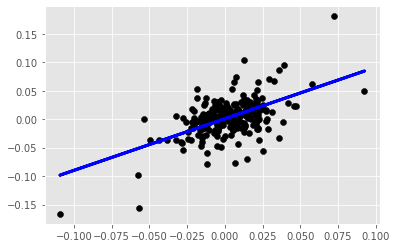

In [13]:
plt.scatter(log_ret['ibov'], log_ret['tots3'],  color='black')
plt.plot(log_ret['ibov'], log_ret['predict'], color='blue', linewidth=3)

O gráfico mostra que o ativo TOTS3 é diretamente proporcional ao IBOV.
Dada a dispersão dos pontos, pode-se notar que a relação entre eles não é muito
bem representada por uma relação linear. Mais informações podem ser obtidas por
uma Análise de Variância (ANOVA) entre os dois.

<b>b)	Desta forma, deve-se fazer a Análise de Variância e os testes de hipóteses dos parâmetros β0 e β1. Sobre os resultados o que o grupo conclui? </b>

In [14]:
anova = get_anova(log_ret[['ibov']],log_ret[['tots3']])
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                  tots3   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     107.7
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.56e-21
Time:                        13:17:12   Log-Likelihood:                 520.16
No. Observations:                 241   AIC:                            -1036.
Df Residuals:                     239   BIC:                            -1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.002      0.402      0.6

Conforme observado acima, o valor de t para B1 nos permite concluir que há relação entre os ativos da TOTS3 e IBOV. Já em relação ao B0, aceita-se a hipótese nula, logo a reta de regressão passa pela origem.

A medida R-quadrado mostra que IBOV explica 31.1% das mudanças de TOTS3.

<b>c)	Avalie a estacionaridade, raiz unitária, heterocedasticidade e autocrrelação dos resíduos da série do ativo escolhido. Desta maneira, corrija e/ou faça sugestão do que se deve fazer para corrigir os problemas da série.  </b>

A medida de Durbin-Watson em nosso teste ANOVA se encontra próximo de 2, o que indica
autocorrelação muito baixa de nossos resíduos ou, em outras palavras, que eles possuem
homocedasticidade.

Para avaliar a estacionaridade, podemos botar os valores de residuo em um gráfico:

<AxesSubplot:xlabel='indice'>

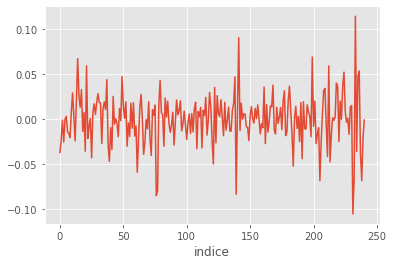

In [15]:
%matplotlib inline
anova.resid.plot()

Podemos observar que os dados se concentram no X=0, sem ter um crescimento ou decaimento
médio ao longo do tempo. Logo podemos considerar os resíduos estacionários.

Para conferir, realizamos um Augmented Dickey-Fuller Test para testarmos a hipótese de
existir uma raiz unitária (alpha = 1%):

In [16]:
def hyp_has_unit_root(x, alpha):
    results = sm.tsa.adfuller(x)
    reject_null = results[1] < alpha
    return not reject_null

print("Existe raiz unitária (alpha = 1%):", hyp_has_unit_root(anova.resid, 0.01))

Existe raiz unitária (alpha = 1%): False


Com o teste acima, podemos concluir com 99% de certeza que nossos residuos, de fato,
não possuem uma raiz unitária.

Os resultados acima indicam que nossa série não requer correções.